In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.plotting.register_matplotlib_converters()
df = pd.read_csv("PS4_GamesSales.csv", header=0, encoding='unicode_escape')
all_games = pd.concat([df.reset_index()], ignore_index=True)

Comparing Categories

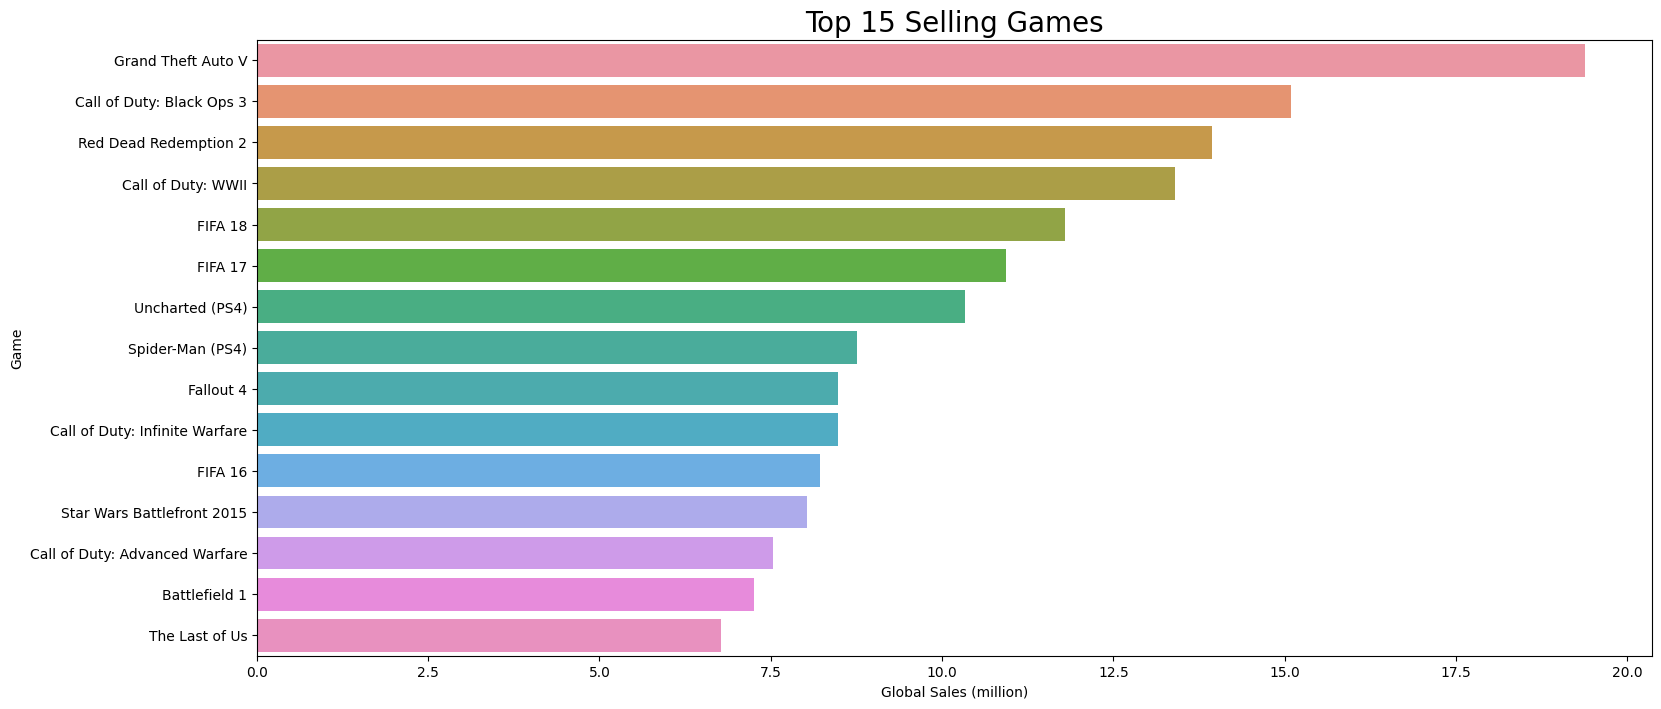

In [3]:
plt.figure(figsize=(18,8))
plt.title("Top 15 Selling Games", fontsize=20)
fig = sns.barplot(data = all_games.groupby("Game", as_index=False).sum(numeric_only=True).sort_values('Global', ascending=False)[:15] , x='Global', y='Game')
fig.set_xlabel('Global Sales (million)')
plt.show()

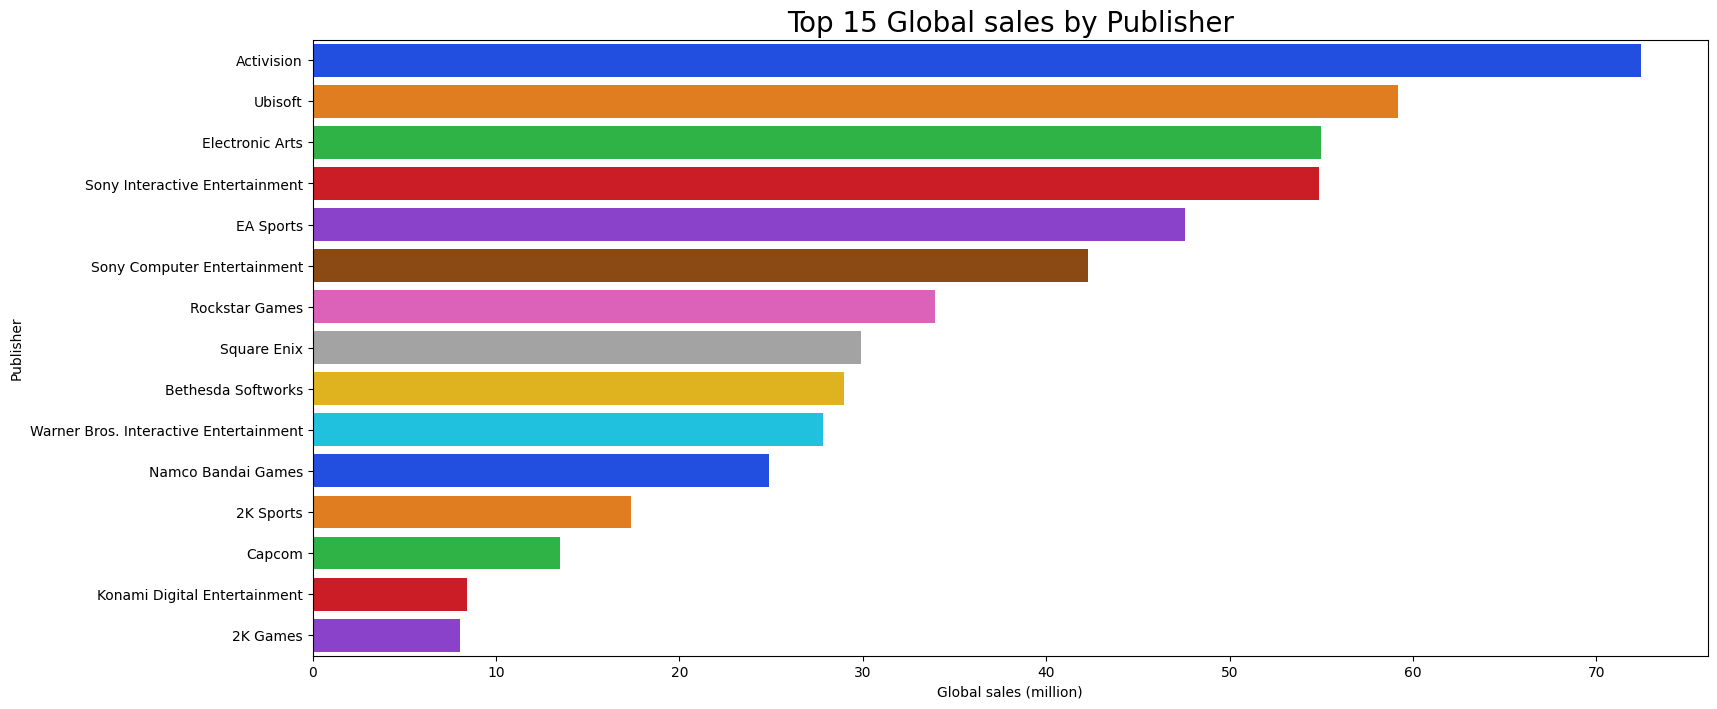

In [4]:
plt.figure(figsize=(18,8))
plt.title("Top 15 Global sales by Publisher", fontsize=20)
fig = sns.barplot(data = all_games.groupby("Publisher", as_index=False).sum(numeric_only=True).sort_values('Global', ascending=False)[:15] , x='Global', y='Publisher', palette='bright')
fig.set_xlabel('Global sales (million)')
plt.show()

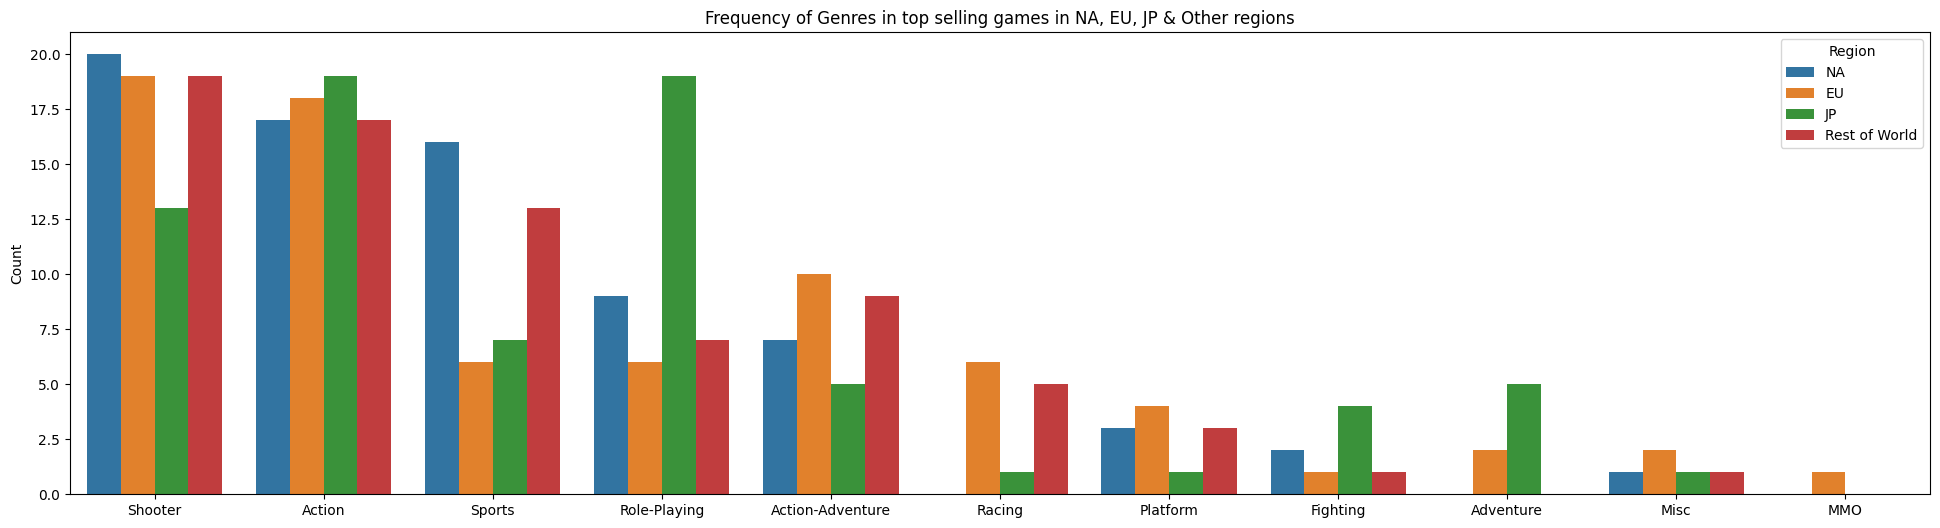

In [5]:
NA_genre = df.sort_values(by='North America', ascending=False)[:75].Genre.value_counts()
EU_genre = df.sort_values(by='Europe', ascending=False)[:75].Genre.value_counts()
JP_genre = df.sort_values(by='Japan', ascending=False)[:75].Genre.value_counts()
RW_genre = df.sort_values(by='Rest of World', ascending=False)[:75].Genre.value_counts()

total_genres = pd.concat([NA_genre, EU_genre, JP_genre, RW_genre], axis=1, keys=['NA', 'EU', 'JP', 'Rest of World']).fillna(0)
tot_genres_order = total_genres.sum(axis=1).sort_values(ascending=False).index

top_genres = total_genres.melt(ignore_index=False, var_name='Region', value_name='Count')

plt.figure(figsize=(24,6))
plt.title("Frequency of Genres in top selling games in NA, EU, JP & Other regions")
sns.barplot(y=top_genres.Count, x=top_genres.index, hue=top_genres.Region, order=tot_genres_order)
plt.show()

Showing Over Times

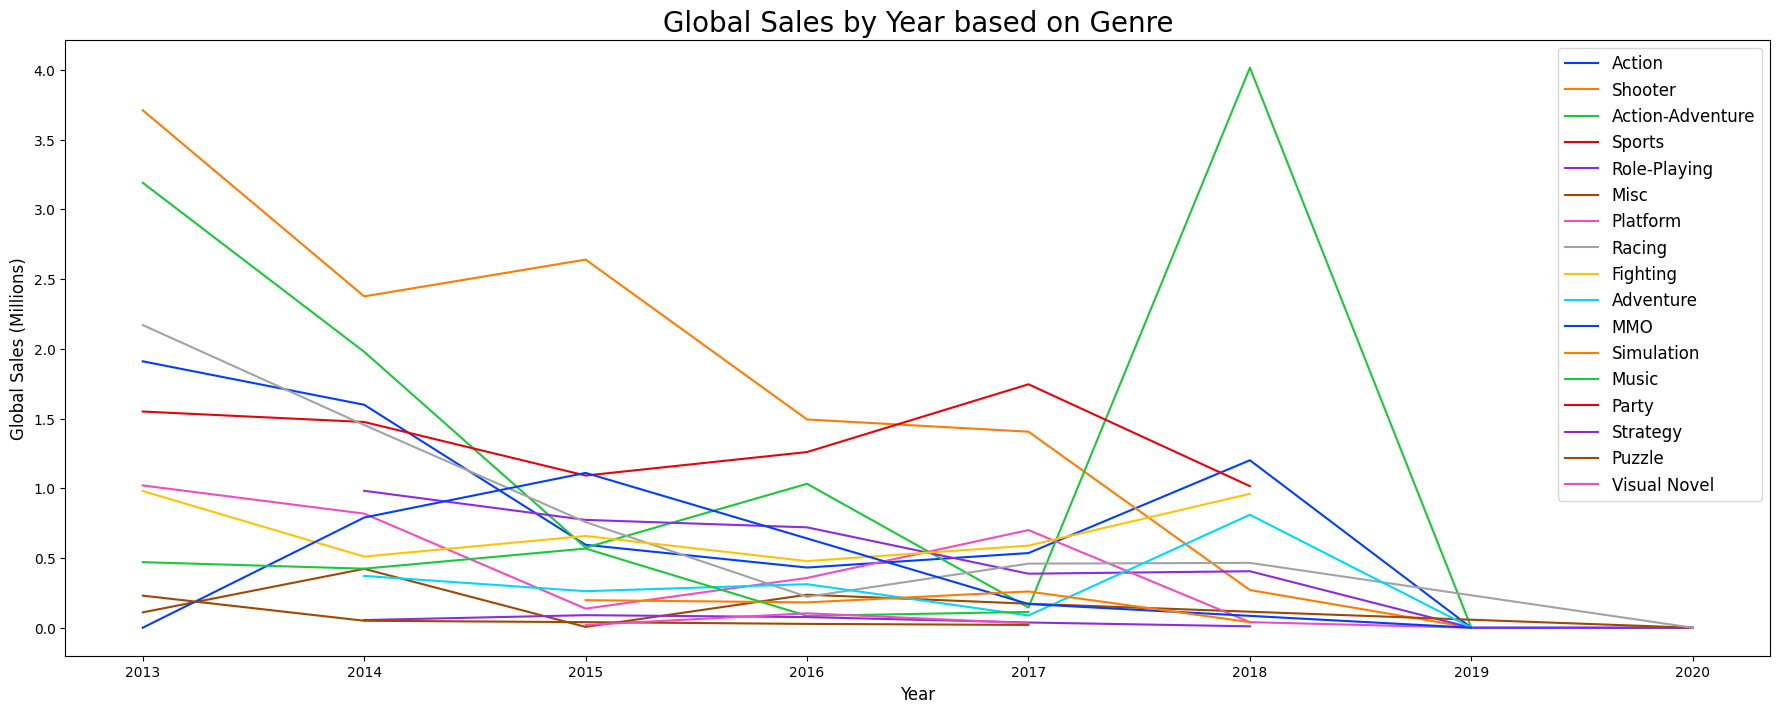

In [6]:
ax = sns.lineplot(x = 'Year', y = 'Global', hue = 'Genre', data = df, err_style=None, palette='bright')
ax.figure.set_size_inches(22, 8)
ax.set_title('Global Sales by Year based on Genre', fontsize=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Global Sales (Millions)', fontsize=12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.show()

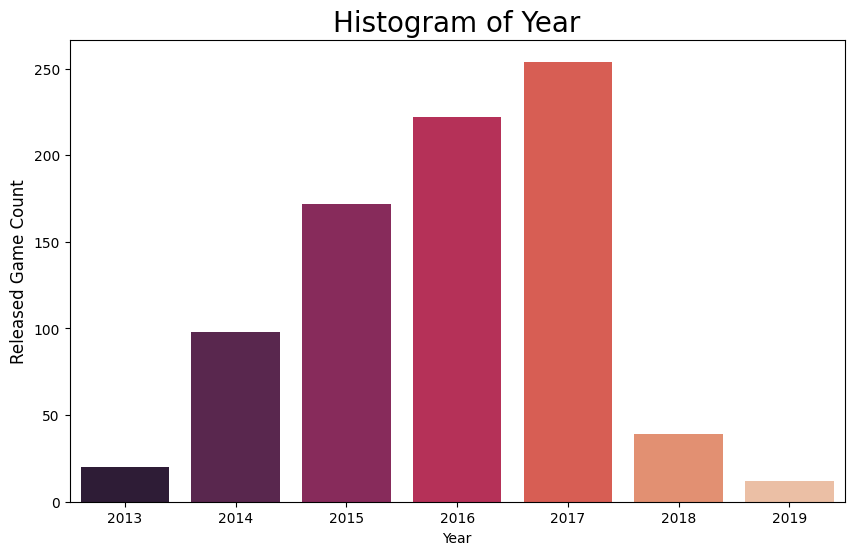

In [69]:
year_data = df.loc[df.Year.notna()]
plt.figure(figsize=(10,6))
plt.title("Histogram of Year", fontsize=20)
ax = sns.countplot(data=year_data, x=year_data.Year.astype(int), order = range(year_data.Year.min().astype(int),year_data.Year.max().astype(int)), palette='rocket')
ax.set_ylabel('Released Game Count', fontsize=12)
plt.show()

Hierarchy + Whole Part Relationship

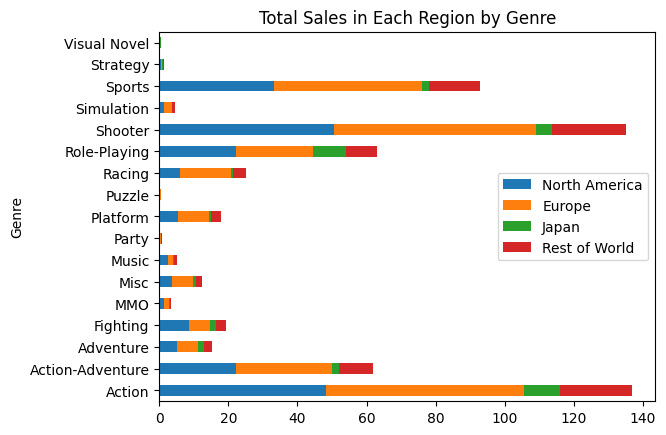

In [18]:
sale_columns = ('North America', 'Europe', 'Japan', 'Rest of World')
total_sales_genre=df.groupby('Genre').sum(numeric_only=True).loc[:,sale_columns]
total_sales_genre.plot(kind='barh', y=['North America', 'Europe', 'Japan', 'Rest of World'], stacked=True, title='Total Sales in Each Region by Genre')
plt.show()

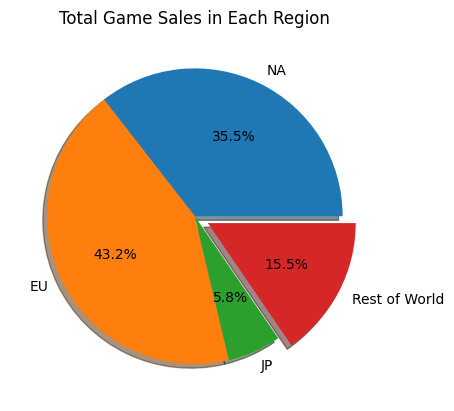

In [67]:
NA = df['North America'].sum()
EU = df['Europe'].sum()
JP = df['Japan'].sum()
RW = df['Rest of World'].sum()
plt.pie([NA, EU, JP, RW], labels = ['NA', 'EU', 'JP', 'Rest of World'], explode=(0, 0, 0, 0.1), autopct='%1.1f%%', shadow=True)
plt.title('Total Game Sales in Each Region')
plt.show()

Plotting Relationships

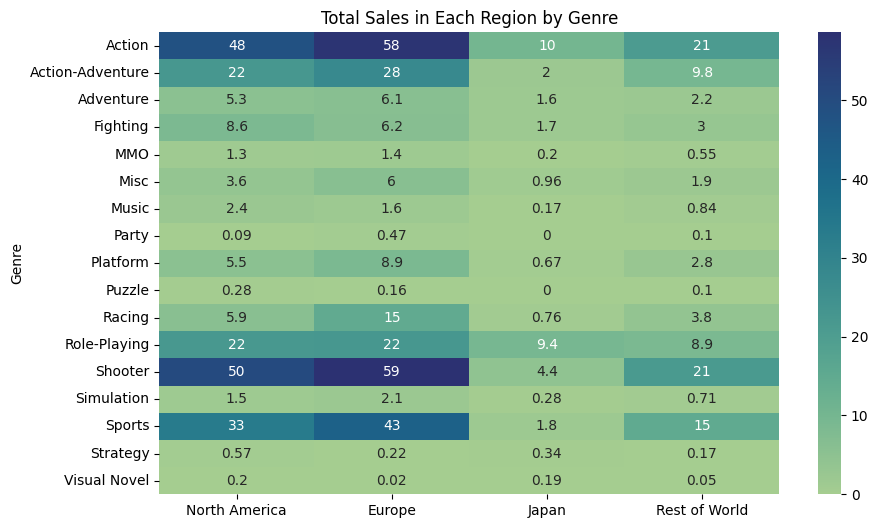

In [13]:
fig, axes_genre_heatmap = plt.subplots(figsize=(10,6))

axes_genre_heatmap.set_title("Total Sales in Each Region by Genre")
sns.heatmap(data=total_sales_genre, ax=axes_genre_heatmap, annot=True, cmap="crest")
plt.show()

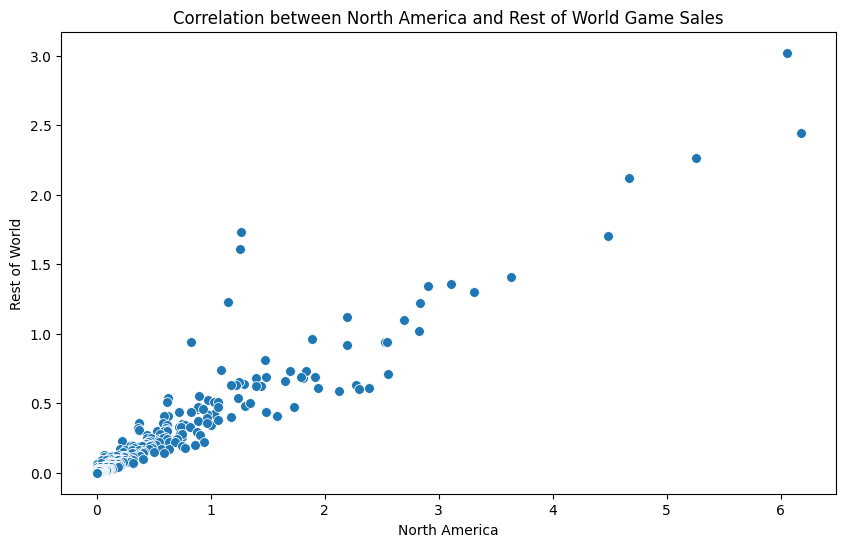

In [50]:
fig, axes_score_scatter = plt.subplots(figsize=(10,6))

axes_score_scatter.set_title("Correlation between North America and Rest of World Game Sales")

sns.scatterplot(data=all_games, x='North America', y='Rest of World', ax=axes_score_scatter, s=50)
plt.show()